In [55]:
pip install --upgrade ppscore pandas scipy

  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)


In [56]:

pip install numpy pandas ppscore


In [57]:
!pip install numpy==1.24.4 pandas==1.5.3

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, StandardScaler
import ppscore as pps
from sklearn.ensemble import IsolationForest

In [59]:
!pip install ppscore

In [60]:
data = pd.read_csv('/content/adult_with_headers.csv')
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [61]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [63]:
data.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education_num,int64
marital_status,object
occupation,object
relationship,object
race,object
sex,object


In [64]:
data.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [65]:
data.duplicated().sum()

24

In [66]:
data.drop_duplicates(inplace = True)

In [67]:
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [68]:
data.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [69]:
data['native_country'] = data['native_country'].astype(str).str.strip()
data['native_country'] = data['native_country'].replace('?', np.nan)
data['native_country'] = data['native_country'].fillna(data['native_country'].mode()[0])

In [70]:
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


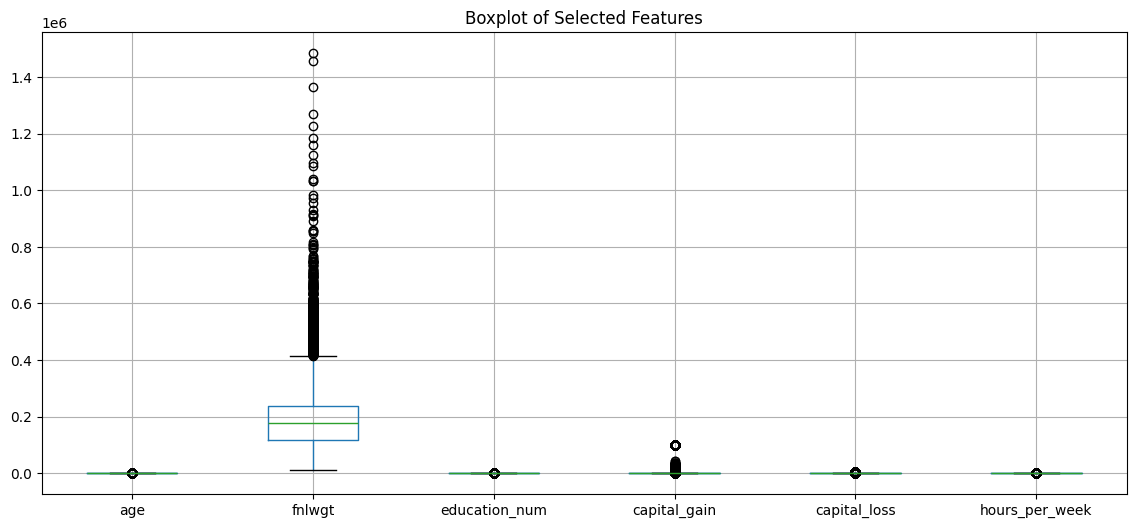

In [71]:
plt.figure(figsize=(14, 6))
data.boxplot(column=['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week'])
plt.title("Boxplot of Selected Features")
plt.show()

In [72]:
iso_forest = IsolationForest(contamination='auto', random_state=42)
data['Outlier'] = iso_forest.fit_predict(data.select_dtypes(include = [int,float]))
data = data[data['Outlier'] != -1].drop(columns = ['Outlier'])
data = data.reset_index(drop = True)

In [73]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)
data['Outlier'] = iso_forest.fit_predict(data.select_dtypes(include=[int, float]))

print(data['Outlier'].value_counts())

data = data[data['Outlier'] != -1].drop(columns=['Outlier'])
data = data.reset_index(drop=True)

 1    27492
-1     1447
Name: Outlier, dtype: int64


<Axes: >

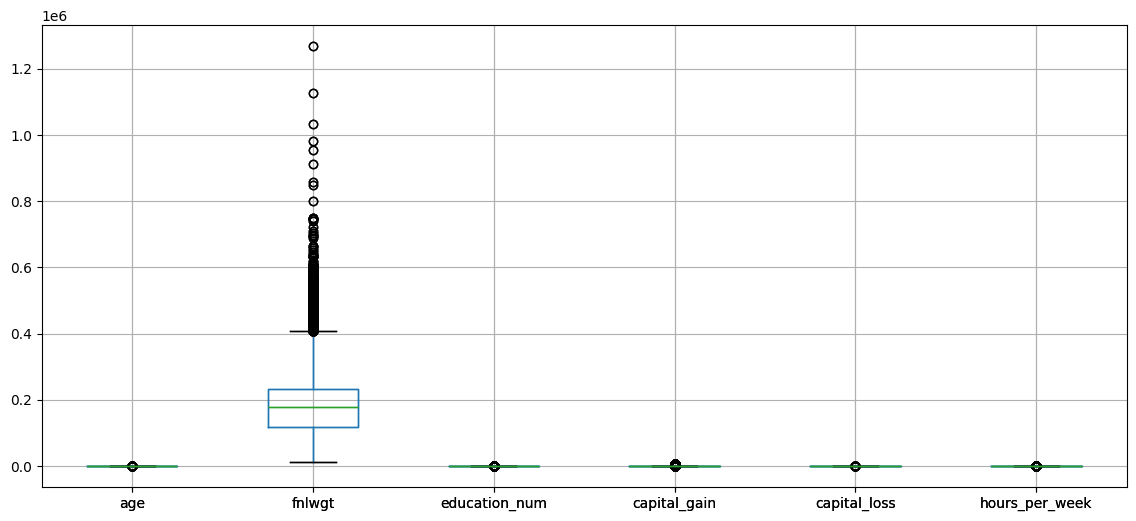

In [74]:
plt.figure(figsize=(14, 6))
data.boxplot(column=['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week'])
data.boxplot()

In [75]:
data['workclass'] = data['workclass'].astype(str).str.strip()
data['workclass_simplified'] = data['workclass'].replace({
    'State-gov': 'Government',
    'Federal-gov': 'Government',
    'Local-gov': 'Government',
    'Self-emp-not-inc': 'Self-employed',
    'Self-emp-inc': 'Self-employed',
    'Never-worked': 'Non-worker',
    'Without-pay': 'Non-worker',
    'Private': 'Private',
    '?': 'Unknown'
})


In [76]:
data['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Never-worked', 'Without-pay'],
      dtype=object)

In [77]:
data['workclass_simplified'].unique()

array(['Government', 'Self-employed', 'Private', 'Unknown', 'Non-worker'],
      dtype=object)

In [78]:
data.drop('workclass', axis = 1, inplace = True)
data['Experience_score'] = data['age'] * data['hours_per_week']
data

,age,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,workclass_simplified,Experience_score
0,39,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Government,1560
1,50,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Self-employed,650
2,38,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Private,1520
3,53,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Private,2120
4,28,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Private,1120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27487,22,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,Private,880
27488,27,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,Private,1026
27489,40,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,Private,1600
27490,58,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,Private,2320


In [79]:
data.drop(['age','hours_per_week'], axis = 1, inplace = True)
data

,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,native_country,income,workclass_simplified,Experience_score
0,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,United-States,<=50K,Government,1560
1,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,United-States,<=50K,Self-employed,650
2,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,United-States,<=50K,Private,1520
3,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,United-States,<=50K,Private,2120
4,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,Cuba,<=50K,Private,1120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27487,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,United-States,<=50K,Private,880
27488,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,United-States,<=50K,Private,1026
27489,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,United-States,>50K,Private,1600
27490,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,United-States,<=50K,Private,2320


In [81]:
en_col = ['workclass_simplified','education','marital_status','occupation','relationship','native_country']
for col in en_col:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])
ohe_data = pd.get_dummies(data[['race','sex','income']], drop_first = True).astype(int)
data = pd.concat([data.drop(columns = ['race','sex','income']), ohe_data], axis = 1)


In [82]:
data.dtypes

,0
fnlwgt,int64
education,int64
education_num,int64
marital_status,int64
occupation,int64
relationship,int64
capital_gain,int64
capital_loss,int64
native_country,int64
workclass_simplified,int64


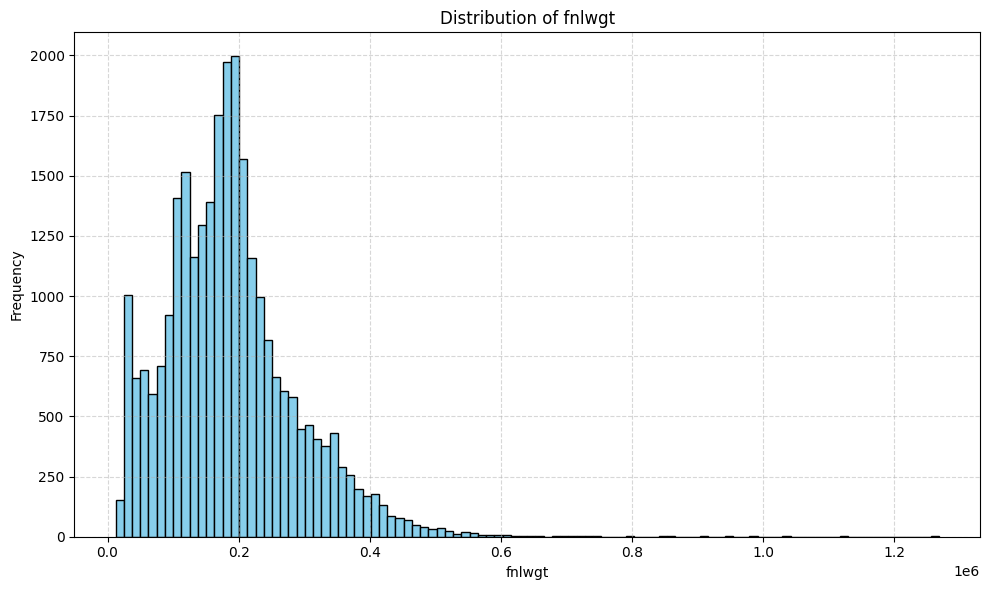

In [83]:
weights = data['fnlwgt'].values

plt.figure(figsize=(10, 6))
plt.hist(weights, bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of fnlwgt')
plt.xlabel('fnlwgt')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

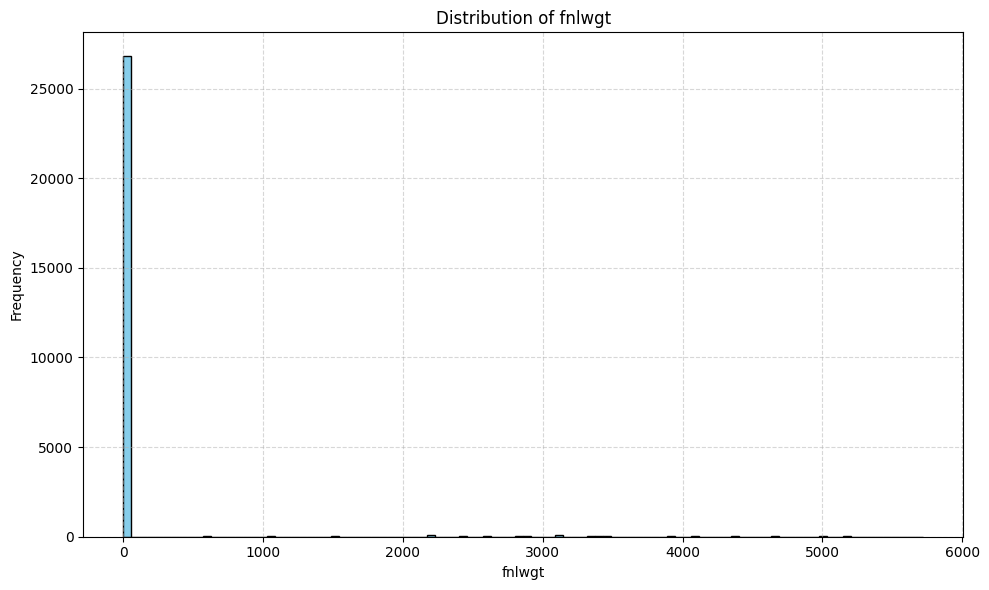

In [84]:
weights = data['capital_gain'].values

plt.figure(figsize=(10, 6))
plt.hist(weights, bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of fnlwgt')
plt.xlabel('fnlwgt')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [85]:
data['capital_gain'] = np.log1p(data['capital_gain'])

In [86]:
data[['fnlwgt']] = np.log1p(data[['fnlwgt']])
data

,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,native_country,workclass_simplified,Experience_score,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K
0,11.258253,9,13,4,1,1,7.684784,0,37,0,1560,0,0,0,1,1,0
1,11.330348,9,13,2,4,0,0.000000,0,37,3,650,0,0,0,1,1,0
2,12.281398,11,9,0,6,1,0.000000,0,37,2,1520,0,0,0,1,1,0
3,12.366157,1,7,2,6,0,0.000000,0,37,2,2120,0,1,0,0,1,0
4,12.732013,9,13,2,10,5,0.000000,0,4,2,1120,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27487,12.644821,15,10,4,11,1,0.000000,0,37,2,880,0,0,0,1,1,0
27488,12.458010,7,12,2,13,5,0.000000,0,37,2,1026,0,0,0,1,0,0
27489,11.947140,11,9,2,7,0,0.000000,0,37,2,1600,0,0,0,1,1,1
27490,11.931050,11,9,6,1,4,0.000000,0,37,2,2320,0,0,0,1,0,0


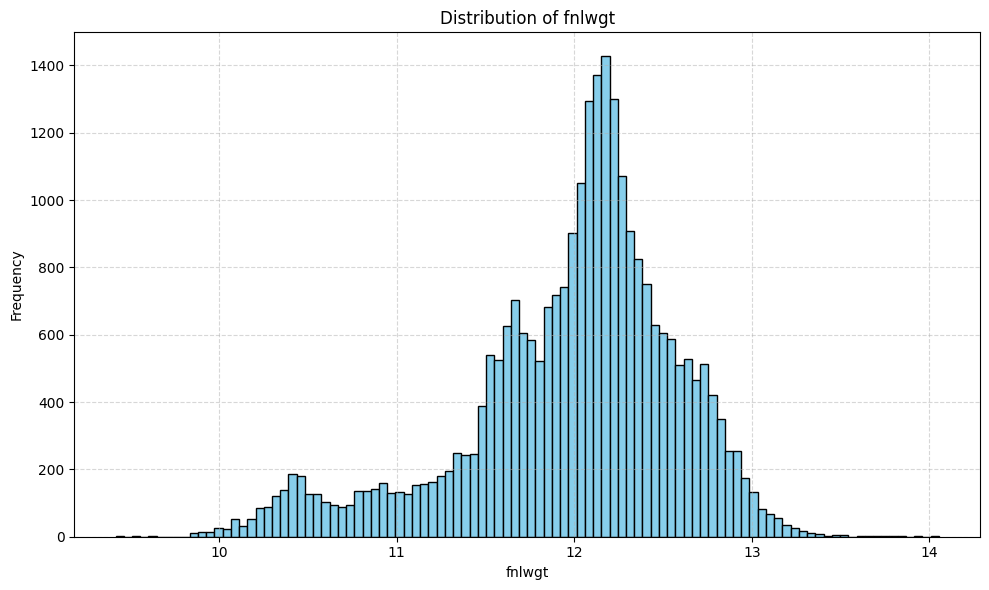

In [87]:
weights = data['fnlwgt'].values

plt.figure(figsize=(10, 6))
plt.hist(weights, bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of fnlwgt')
plt.xlabel('fnlwgt')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

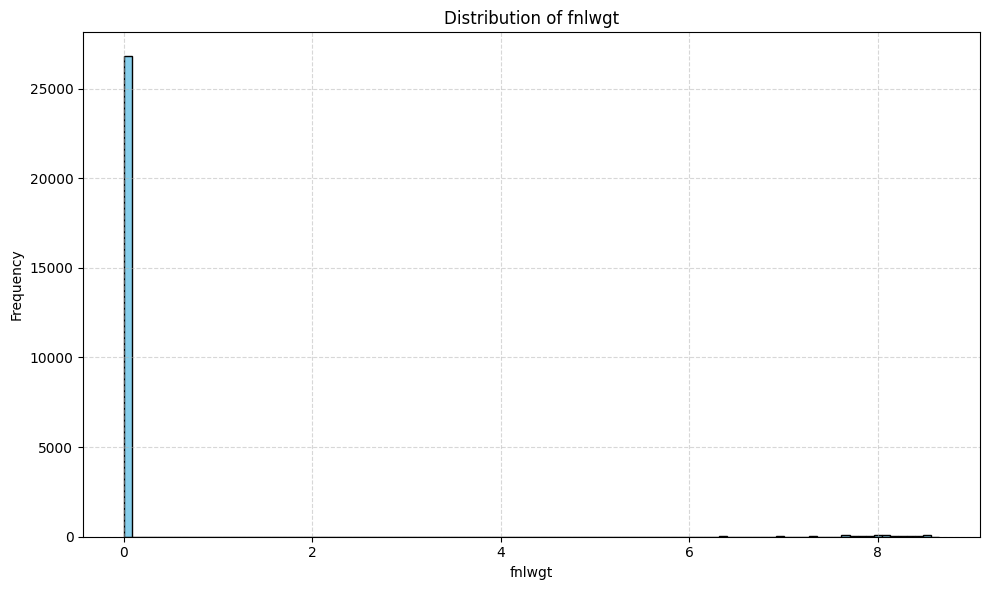

In [88]:
weights = data['capital_gain'].values

plt.figure(figsize=(10, 6))
plt.hist(weights, bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of fnlwgt')
plt.xlabel('fnlwgt')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [90]:
scale_features = ['Experience_score', 'fnlwgt', 'capital_gain', 'capital_loss']

std_scaler = StandardScaler()

scaled_array = std_scaler.fit_transform(data[scale_features])

data.loc[:, scale_features] = scaled_array

scaled_array


array([[ 6.02329920e-02, -1.17796923e+00,  5.98440822e+00,
        -3.28364272e-02],
       [-1.31878299e+00, -1.06025494e+00, -1.60866001e-01,
        -3.28364272e-02],
       [-3.83094904e-04,  4.92580858e-01, -1.60866001e-01,
        -3.28364272e-02],
       ...,
       [ 1.20849079e-01, -5.31820682e-02, -1.60866001e-01,
        -3.28364272e-02],
       [ 1.21193864e+00, -7.94529716e-02, -1.60866001e-01,
        -3.28364272e-02],
       [-1.63701744e+00,  3.81719631e-01, -1.60866001e-01,
        -3.28364272e-02]])

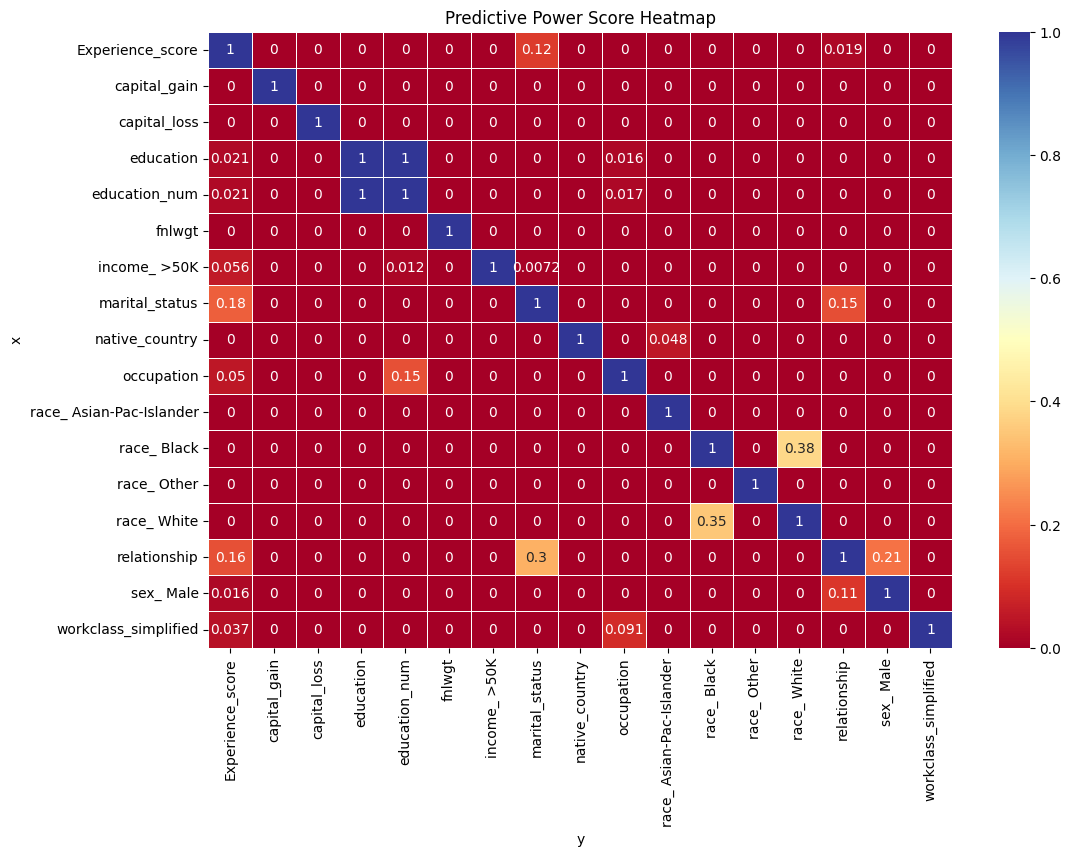

In [94]:
pps_mat = pps.matrix(data)


pps_pivot = pps_mat.pivot(index='x', columns='y', values='ppscore')

plt.figure(figsize=(12, 8))
sns.heatmap(pps_pivot, annot=True, cmap='RdYlBu', linewidths=0.5)
plt.title('Predictive Power Score Heatmap')
plt.show()

<Axes: >

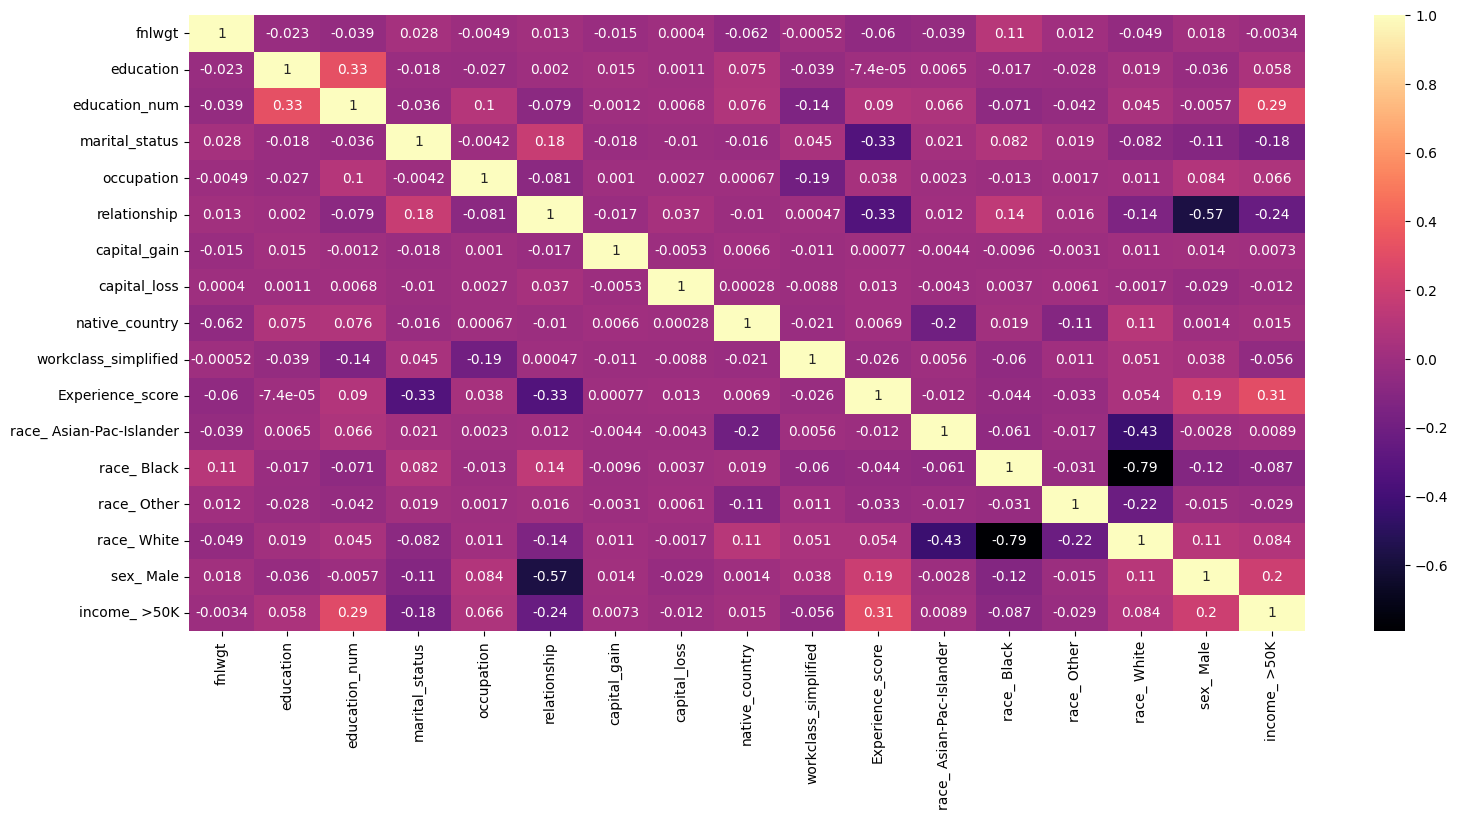

In [92]:
plt.figure(figsize = (18,8))
sns.heatmap(data.corr(), annot = True, cmap  = 'magma')